In [1]:
#setting up notebook
import pandas as pd 
import json
from sqlalchemy import create_engine
import numpy as np
import datetime as datetime

#for the clustering process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [2]:
#reading in the csv file
csv_file3 = "./movies_metadata.csv"
data3 = pd.read_csv(csv_file3)
data3

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_2704\1872846420.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv(csv_file3)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
#changing the datatype for release_date to year
data3['release_date'] = pd.to_datetime(data3['release_date'], errors='coerce').dt.year

In [4]:
#removing unnecessary columns from our dataframe
data3_df = data3[['id', 'release_date', 'runtime', 'budget', 'revenue', 'vote_average', 'vote_count']]
data3_df

,id,release_date,runtime,budget,revenue,vote_average,vote_count
0,862,1995.0,81.0,30000000,373554033.0,7.7,5415.0
1,8844,1995.0,104.0,65000000,262797249.0,6.9,2413.0
2,15602,1995.0,101.0,0,0.0,6.5,92.0
3,31357,1995.0,127.0,16000000,81452156.0,6.1,34.0
4,11862,1995.0,106.0,0,76578911.0,5.7,173.0
...,...,...,...,...,...,...,...
45461,439050,NaN,90.0,0,0.0,4.0,1.0
45462,111109,2011.0,360.0,0,0.0,9.0,3.0
45463,67758,2003.0,90.0,0,0.0,3.8,6.0
45464,227506,1917.0,87.0,0,0.0,0.0,0.0


In [5]:
#dropping null values
data3_df.replace('..', np.nan, inplace=True)
drop_df = data3_df.dropna(how='any')
drop_df

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_2704\292006898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3_df.replace('..', np.nan, inplace=True)


,id,release_date,runtime,budget,revenue,vote_average,vote_count
0,862,1995.0,81.0,30000000,373554033.0,7.7,5415.0
1,8844,1995.0,104.0,65000000,262797249.0,6.9,2413.0
2,15602,1995.0,101.0,0,0.0,6.5,92.0
3,31357,1995.0,127.0,16000000,81452156.0,6.1,34.0
4,11862,1995.0,106.0,0,76578911.0,5.7,173.0
...,...,...,...,...,...,...,...
45460,30840,1991.0,104.0,0,0.0,5.7,26.0
45462,111109,2011.0,360.0,0,0.0,9.0,3.0
45463,67758,2003.0,90.0,0,0.0,3.8,6.0
45464,227506,1917.0,87.0,0,0.0,0.0,0.0


In [6]:
#changing datatypes for release_date, runtime, revenue, and vote_count to integers
variables = ['release_date', 'runtime', 'revenue', 'vote_count']
for column_name in variables:
 drop_df[column_name] = drop_df[column_name].astype(int)

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_2704\3783096488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df[column_name] = drop_df[column_name].astype(int)


In [7]:
drop_df

,id,release_date,runtime,budget,revenue,vote_average,vote_count
0,862,1995,81,30000000,373554033,7.7,5415
1,8844,1995,104,65000000,262797249,6.9,2413
2,15602,1995,101,0,0,6.5,92
3,31357,1995,127,16000000,81452156,6.1,34
4,11862,1995,106,0,76578911,5.7,173
...,...,...,...,...,...,...,...
45460,30840,1991,104,0,0,5.7,26
45462,111109,2011,360,0,0,9.0,3
45463,67758,2003,90,0,0,3.8,6
45464,227506,1917,87,0,0,0.0,0


In [8]:
#dropping all rows with a release date less than 1990
drop2_df = drop_df[drop_df['release_date'] > 1990]
drop2_df

,id,release_date,runtime,budget,revenue,vote_average,vote_count
0,862,1995,81,30000000,373554033,7.7,5415
1,8844,1995,104,65000000,262797249,6.9,2413
2,15602,1995,101,0,0,6.5,92
3,31357,1995,127,16000000,81452156,6.1,34
4,11862,1995,106,0,76578911,5.7,173
...,...,...,...,...,...,...,...
45459,222848,1995,85,0,0,3.5,1
45460,30840,1991,104,0,0,5.7,26
45462,111109,2011,360,0,0,9.0,3
45463,67758,2003,90,0,0,3.8,6


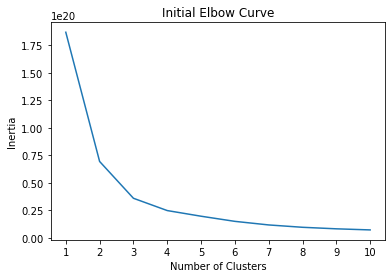

In [9]:
#finding the best value for k using the Elbow Curve
inertia = []

k= [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(drop2_df)
    inertia.append(km.inertia_)
    
#Defining a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k":k, "inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)

#plotting our Elbow Curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Initial Elbow Curve')
plt.show()

In [10]:
#finding the centroids
km.cluster_centers_

array([[ 1.33031151e+05,  2.00709175e+03,  9.29428803e+01,
         9.67710541e+05,  5.08851798e+05,  5.58067635e+00,
         3.81380426e+01],
       [ 8.38144127e+04,  2.00996825e+03,  1.25301587e+02,
         1.44365079e+08,  7.55893369e+08,  6.87777778e+00,
         5.10030159e+03],
       [ 6.03773705e+04,  2.00655357e+03,  1.16183036e+02,
         9.56669643e+07,  3.37932083e+08,  6.43794643e+00,
         2.28732589e+03],
       [ 5.88920737e+04,  2.00502344e+03,  1.09665774e+02,
         2.90923501e+07,  3.20763005e+07,  6.06697924e+00,
         3.93068989e+02],
       [ 6.34561268e+04,  2.00616732e+03,  1.09870588e+02,
         4.08271989e+07,  1.01435082e+08,  6.25228758e+00,
         8.52418301e+02],
       [ 8.30848571e+04,  2.01142857e+03,  1.43571429e+02,
         2.01428571e+08,  1.59999966e+09,  7.34285714e+00,
         7.70100000e+03],
       [ 1.99950000e+04,  2.00900000e+03,  1.62000000e+02,
         2.37000000e+08, -2.14748365e+09,  7.20000000e+00,
         1.2114000

In [11]:
sample_test=np.array([-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0])
second_test=sample_test.reshape(1,-1)
km.predict(second_test)

C:\Users\Kirsten\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [12]:
#initializing model with our first cluster test # of 4 from our elbow curve above
model_1 = KMeans(n_clusters=4, random_state=5)

In [13]:
#fitting the model to our df
model_1.fit(drop2_df)

KMeans(n_clusters=4, random_state=5)

In [14]:
#getting the predictions
predictions_1 = model_1.predict(drop2_df)
print(predictions_1)

[1 2 0 ... 0 0 0]


In [15]:
#adding our initial prdiction class to drop2_df
drop2_df["class"] = model_1.labels_
drop2_df

C:\Users\Kirsten\AppData\Local\Temp\ipykernel_2704\1800105221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop2_df["class"] = model_1.labels_


,id,release_date,runtime,budget,revenue,vote_average,vote_count,class
0,862,1995,81,30000000,373554033,7.7,5415,1
1,8844,1995,104,65000000,262797249,6.9,2413,2
2,15602,1995,101,0,0,6.5,92,0
3,31357,1995,127,16000000,81452156,6.1,34,2
4,11862,1995,106,0,76578911,5.7,173,0
...,...,...,...,...,...,...,...,...
45459,222848,1995,85,0,0,3.5,1,0
45460,30840,1991,104,0,0,5.7,26,0
45462,111109,2011,360,0,0,9.0,3,0
45463,67758,2003,90,0,0,3.8,6,0


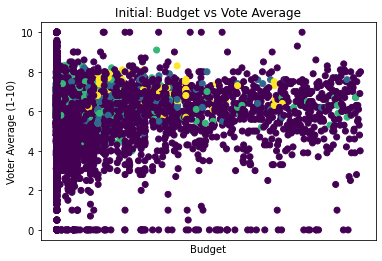

In [16]:
#plotting Initial: Budget vs Vote Average
plt.scatter(x=drop2_df["budget"], y=drop2_df["vote_average"], c=drop2_df["class"])
plt.xticks(range(2000000,4000000,60000000))
plt.xlabel('Budget')
plt.ylabel('Voter Average (1-10)')
plt.title('Initial: Budget vs Vote Average')
plt.show()

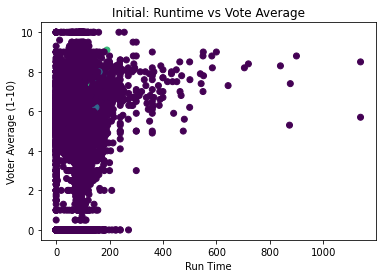

In [17]:
#plotting the Initial: Runtime vs Vote Average
plt.scatter(x=drop2_df["runtime"], y=drop2_df["vote_average"], c=drop2_df["class"])
plt.xlabel('Run Time')
plt.ylabel('Voter Average (1-10)')
plt.title('Initial: Runtime vs Vote Average')
plt.show()

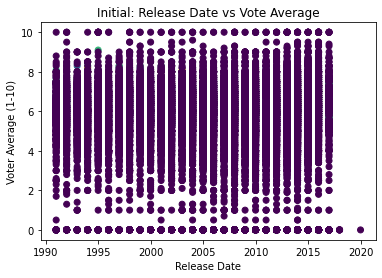

In [18]:
#plotting the Initial: Release Date vs Vote Average
plt.scatter(x=drop2_df["release_date"], y=drop2_df["vote_average"], c=drop2_df["class"])
plt.xlabel('Release Date')
plt.ylabel('Voter Average (1-10)')
plt.title('Initial: Release Date vs Vote Average')
plt.show()

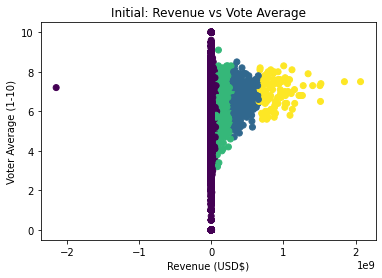

In [19]:
#plotting the Initial: Revenue vs Vote Average
plt.scatter(x=drop2_df["revenue"], y=drop2_df["vote_average"], c=drop2_df["class"])
plt.xlabel('Revenue (USD$)')
plt.ylabel('Voter Average (1-10)')
plt.title('Initial: Revenue vs Vote Average')
plt.show()

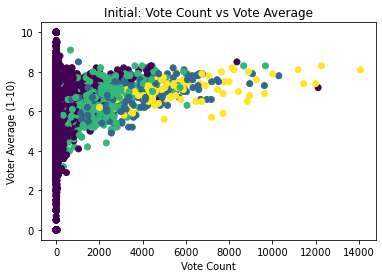

In [20]:
#plotting the Initial: Vote Count vs Vote Average
plt.scatter(x=drop2_df["vote_count"], y=drop2_df["vote_average"], c=drop2_df["class"])
plt.xlabel('Vote Count')
plt.ylabel('Voter Average (1-10)')
plt.title('Initial: Vote Count vs Vote Average')
plt.show()

# looking at data after dropping columns with null/0 values

In [21]:
#modifying our data by dropping rows with null/0 values
final_df = drop2_df[(drop2_df[['runtime', 'budget', 'revenue']] !=0).all(axis=1)]
final_df

,id,release_date,runtime,budget,revenue,vote_average,vote_count,class
0,862,1995,81,30000000,373554033,7.7,5415,1
1,8844,1995,104,65000000,262797249,6.9,2413,2
3,31357,1995,127,16000000,81452156,6.1,34,2
4,11862,1995,106,0,76578911,5.7,173,0
5,949,1995,170,60000000,187436818,7.7,1886,2
...,...,...,...,...,...,...,...,...
45381,264269,2014,90,0,320395,4.4,4,0
45401,240789,2009,110,0,50656,6.3,3,0
45409,62757,2006,100,800000,1328612,5.8,6,0
45412,63281,2010,107,2000000,1268793,4.0,3,0


In [22]:
#creating a final dataframe that has our predictions
final_df = final_df.drop(['class'], axis=1)
final_df

,id,release_date,runtime,budget,revenue,vote_average,vote_count
0,862,1995,81,30000000,373554033,7.7,5415
1,8844,1995,104,65000000,262797249,6.9,2413
3,31357,1995,127,16000000,81452156,6.1,34
4,11862,1995,106,0,76578911,5.7,173
5,949,1995,170,60000000,187436818,7.7,1886
...,...,...,...,...,...,...,...
45381,264269,2014,90,0,320395,4.4,4
45401,240789,2009,110,0,50656,6.3,3
45409,62757,2006,100,800000,1328612,5.8,6
45412,63281,2010,107,2000000,1268793,4.0,3


In [23]:
#starting the final elbow plot
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(final_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k":k, "inertia":inertia}
df_eblow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,1.870493e+20
1,2,6.938775e+19
2,3,3.587135e+19
3,4,2.467497e+19
4,5,1.952926e+19
5,6,1.484993e+19
6,7,1.158983e+19
7,8,9.449650e+18
8,9,8.057997e+18
9,10,7.057934e+18


In [24]:
#finding centroid
km.cluster_centers_

array([[ 9.22489122e+04,  2.00614299e+03,  1.04841056e+02,
         6.27222307e+06,  7.13548888e+06,  6.09542805e+00,
         1.59449524e+02],
       [ 6.30669167e+04,  2.00681373e+03,  1.16269608e+02,
         9.78230392e+07,  3.49628514e+08,  6.47107843e+00,
         2.38643627e+03],
       [ 7.65888254e+04,  2.00926984e+03,  1.27603175e+02,
         1.45555556e+08,  7.84457195e+08,  6.86984127e+00,
         5.11860317e+03],
       [ 6.01667632e+04,  2.00573120e+03,  1.11145600e+02,
         4.55553809e+07,  1.24308611e+08,  6.31840000e+00,
         9.95084800e+02],
       [ 1.99950000e+04,  2.00900000e+03,  1.62000000e+02,
         2.37000000e+08, -2.14748365e+09,  7.20000000e+00,
         1.21140000e+04],
       [ 6.33101738e+04,  2.00590160e+03,  1.08816489e+02,
         3.12286731e+07,  5.20477979e+07,  6.10762411e+00,
         5.37959220e+02],
       [ 7.14116354e+04,  2.00823958e+03,  1.15625000e+02,
         1.26422083e+08,  5.40180655e+08,  6.76875000e+00,
         3.7405729

In [ ]:
#predictions
sample_test=np.array([-3.0,-3.0])
second_test=sample_test(-1,1)
km.predict(second_test)

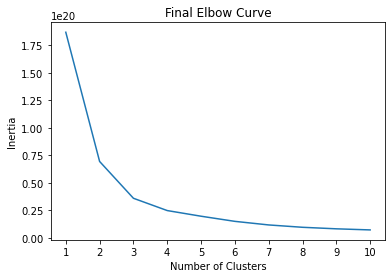

In [25]:
#plotting the final elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Final Elbow Curve')
plt.show()

In [26]:
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    predictions = model.predict(data)
    data["class"] = model.labels_
    
    return data

In [27]:
#adding the predictions to the df
clusters = get_clusters(4, final_df)
clusters

,id,release_date,runtime,budget,revenue,vote_average,vote_count,class
0,862,1995,81,30000000,373554033,7.7,5415,2
1,8844,1995,104,65000000,262797249,6.9,2413,0
3,31357,1995,127,16000000,81452156,6.1,34,3
4,11862,1995,106,0,76578911,5.7,173,3
5,949,1995,170,60000000,187436818,7.7,1886,0
...,...,...,...,...,...,...,...,...
45381,264269,2014,90,0,320395,4.4,4,3
45401,240789,2009,110,0,50656,6.3,3,3
45409,62757,2006,100,800000,1328612,5.8,6,3
45412,63281,2010,107,2000000,1268793,4.0,3,3


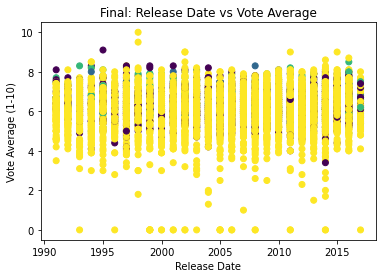

In [28]:
#plotting Final: Release Date vs Vote Average
plt.scatter(x=final_df['release_date'], y=final_df['vote_average'], c=final_df['class'])
plt.xlabel('Release Date')
plt.ylabel('Vote Average (1-10)')
plt.title('Final: Release Date vs Vote Average')
plt.show()

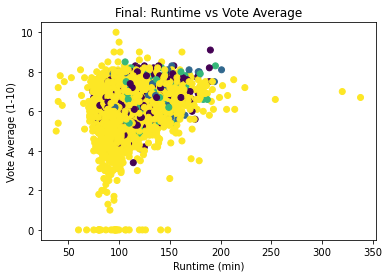

In [29]:
#plotting Final: Runtime vs Vote Average
plt.scatter(x=final_df['runtime'], y=final_df['vote_average'], c=final_df['class'])
plt.xlabel('Runtime (min)')
plt.ylabel('Vote Average (1-10)')
plt.title('Final: Runtime vs Vote Average')
plt.show()

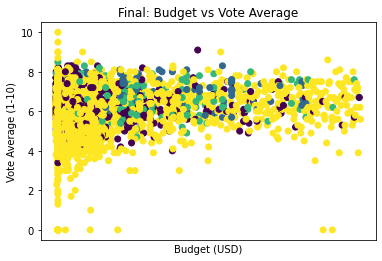

In [30]:
#plotting Final: Budget vs Vote Average
plt.scatter(x=final_df['budget'], y=final_df['vote_average'], c=final_df['class'])
plt.xlabel('Budget (USD)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Vote Average (1-10)')
plt.title('Final: Budget vs Vote Average')
plt.show()

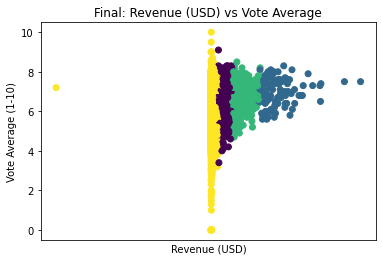

In [31]:
#plotting Final: Revenue vs Vote Average
plt.scatter(x=final_df['revenue'], y=final_df['vote_average'], c=final_df['class'])
plt.xlabel('Revenue (USD)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Vote Average (1-10)')
plt.title('Final: Revenue (USD) vs Vote Average')
plt.show()

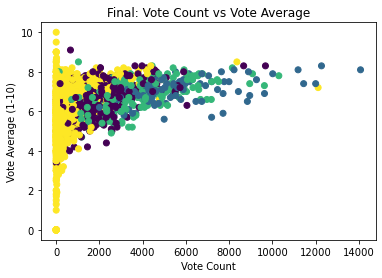

In [32]:
#plotting Final: Vote Count vs Vote Average
plt.scatter(x=final_df['vote_count'], y=final_df['vote_average'], c=final_df['class'])
plt.xlabel('Vote Count')
plt.ylabel('Vote Average (1-10)')
plt.title('Final: Vote Count vs Vote Average')
plt.show()